In [44]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import burst_detector as bd
import scipy.io
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [45]:
# loading data
fs = 30000
times = np.load('../results/s0_matlab/spike_times.npy').flatten()/fs
clusters_old = np.load('../results/s0_matlab/spike_clusters.npy').flatten()
amplitudes = np.load('../results/s0_matlab/amplitudes.npy').flatten()

n_clusters = np.unique(clusters_old).size
n = times.shape[0]

In [46]:
# fix cluster numbering
clusters, fix_clust = bd.fix_clust_ids(clusters_old, n_clusters)

In [47]:
st0 = np.array(bd.find_times(times, clusters, [0])[0])
st1 = np.array(bd.find_times(times, clusters, [1])[0])

In [48]:
x0 = bd.fit_PoissonGP(st0, [.5], [0, 190], .1)

Optimization terminated successfully.
         Current function value: -45.549200
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
         Hessian evaluations: 13


In [49]:
x1 = bd.fit_PoissonGP(st1, [.5], [0, 190], .1)

Optimization terminated successfully.
         Current function value: 77.591199
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Hessian evaluations: 11


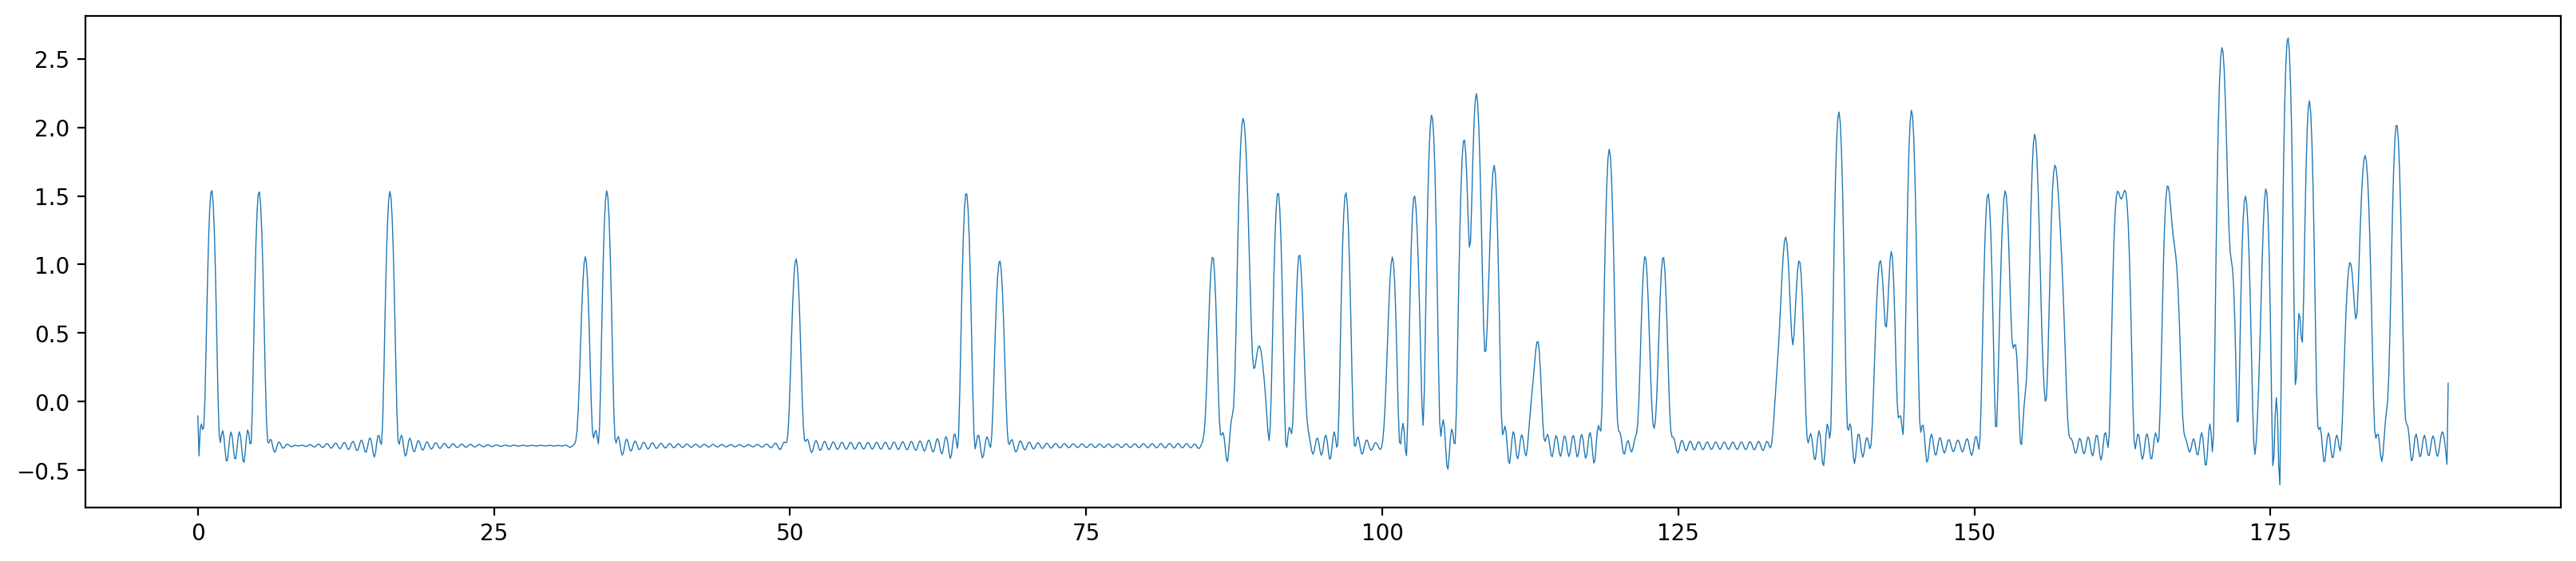

In [50]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 1900),x0, linewidth=0.5)

In [1]:
import pandas as pd

In [54]:
bursts0 = pd.read_csv('./bursts.csv')[["level","start","end"]].to_numpy()
bursts1 = pd.read_csv('./bursts1.csv')[["level","start","end"]].to_numpy()

(180.0, 190.0)

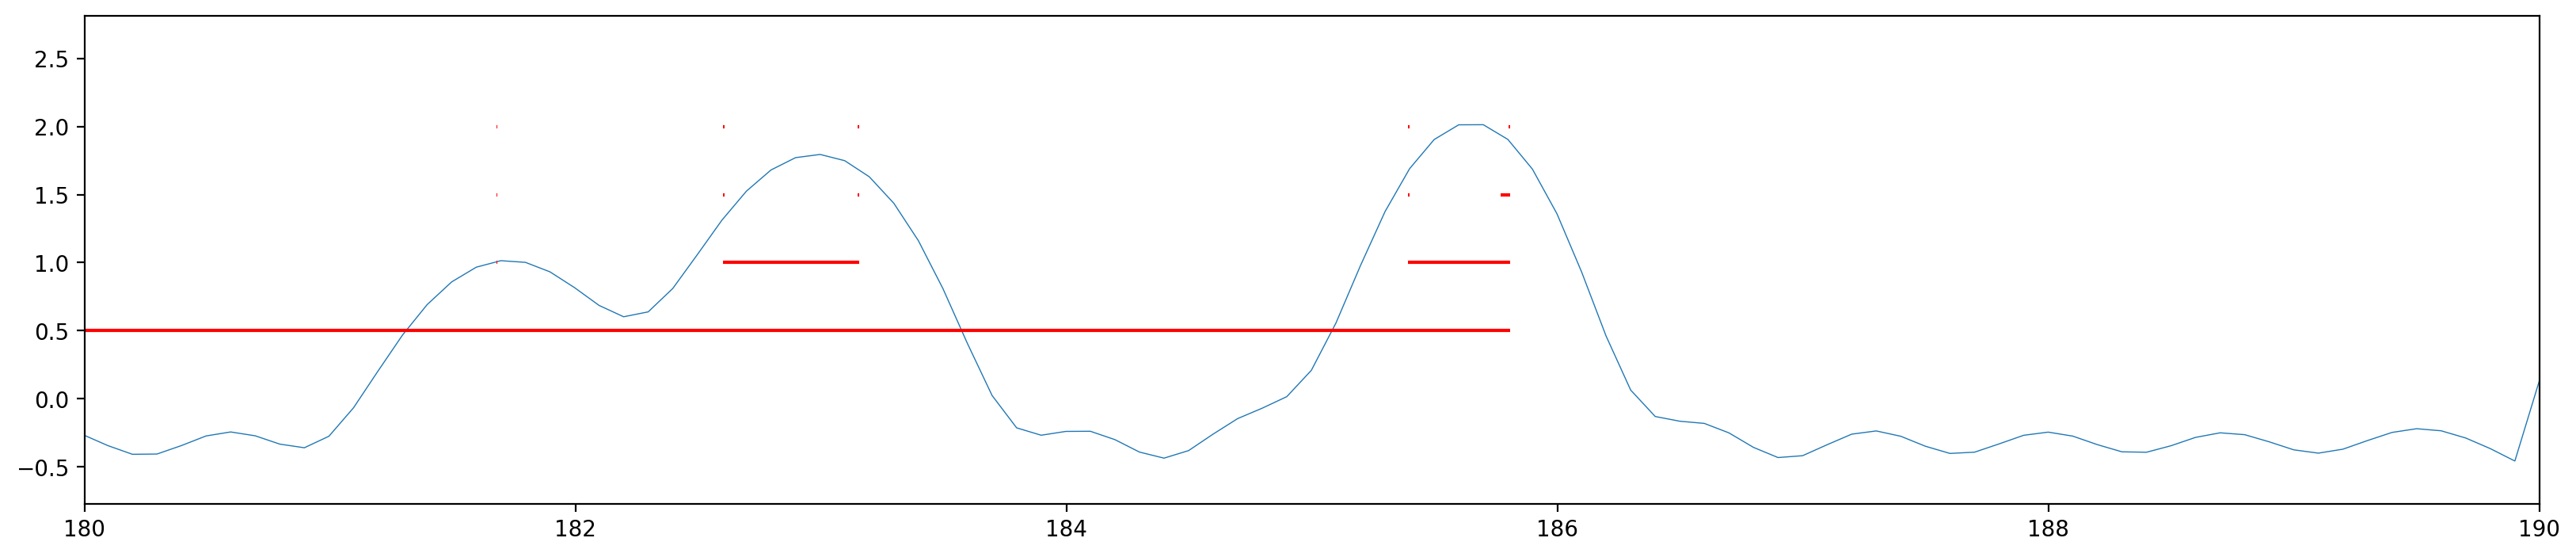

In [55]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 1900),x, linewidth=0.5)
plt.hlines(bursts0[:,0]/2, bursts0[:,1], bursts0[:,2], 'r')
plt.xlim([180, 190])

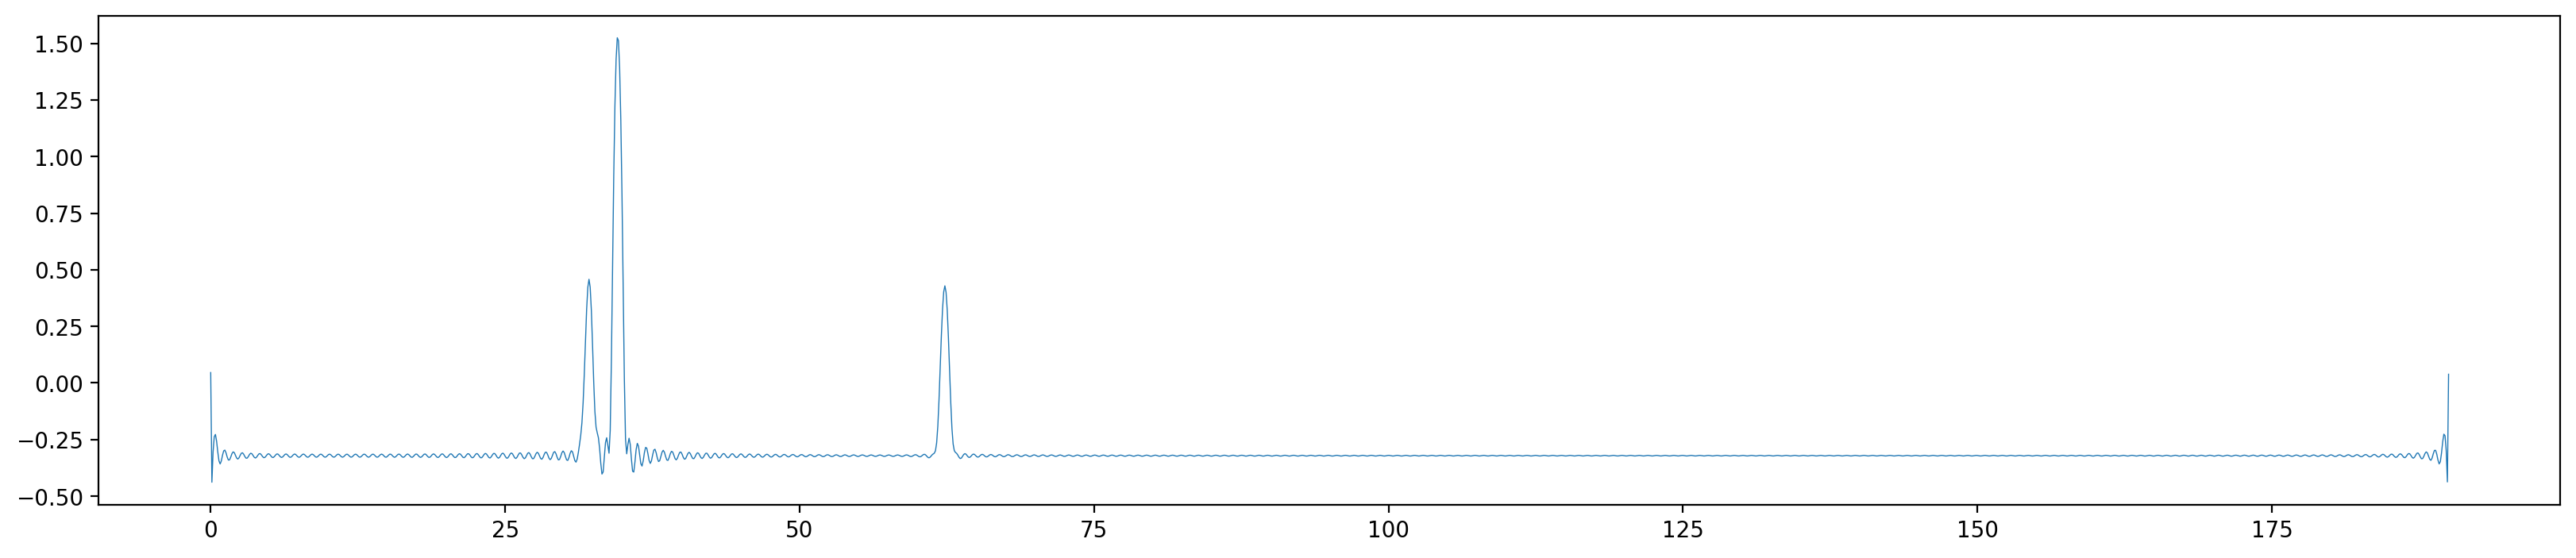

In [59]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 1900),x1, linewidth=0.5)

(30.0, 40.0)

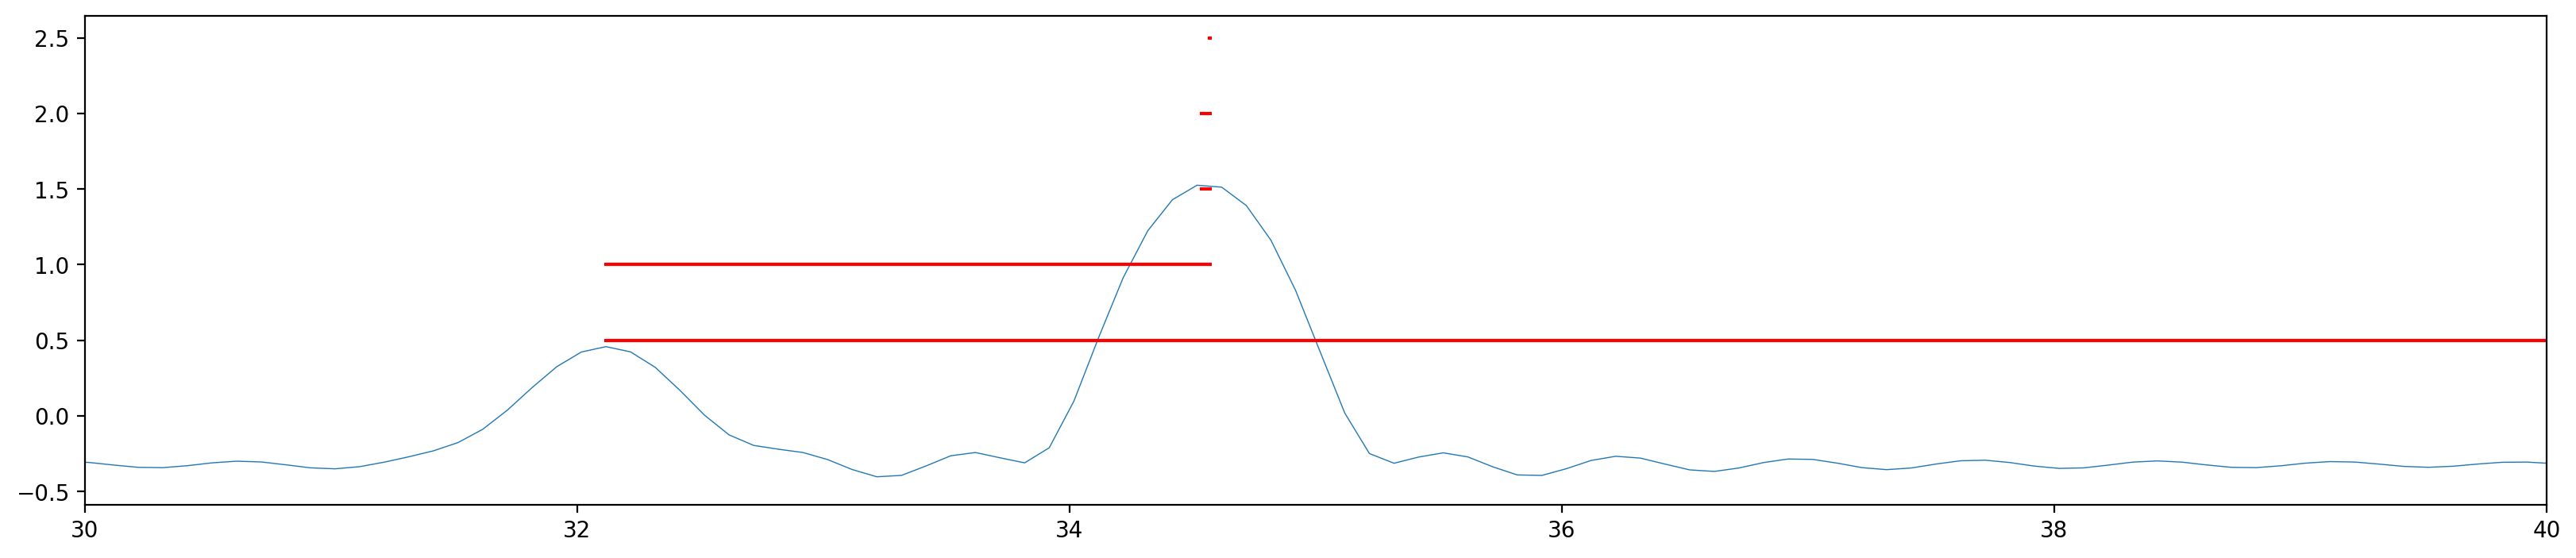

In [57]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 1900),x1, linewidth=0.5)
plt.hlines(bursts1[:,0]/2, bursts1[:,1], bursts1[:,2], 'r')
plt.xlim([30, 40])

In [58]:
st1

array([32.10996667, 34.52983333, 34.56223333, 34.57893333, 62.3295    ])